### Importação dos dados



In [107]:
import pandas as pd
import matplotlib.pyplot as plt

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url1)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [90]:
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
lista_lojas = [loja1, loja2, loja3, loja4]

dict_vendas = {nome_loja: df_loja['Preço'].sum() for nome_loja, df_loja in zip(lojas, lista_lojas)}
for chave in dict_vendas.keys():
  print(chave, dict_vendas[chave])

Loja 1 1534509.12
Loja 2 1488459.06
Loja 3 1464025.03
Loja 4 1384497.58


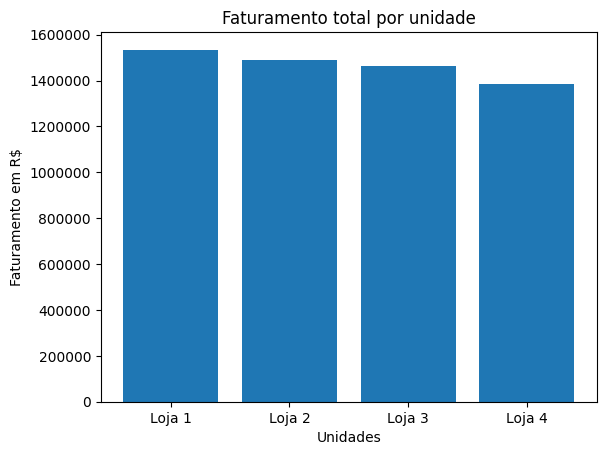

In [91]:
plt.bar(lojas, (dict_vendas.values()))
plt.ticklabel_format(style='plain', axis='y')
plt.title('Faturamento total por unidade')
plt.xlabel('Unidades')
plt.ylabel('Faturamento em R$')
plt.show()

# 2. Vendas por Categoria


In [105]:
dict_vendas_por_categoria = {nome_loja: df_loja['Categoria do Produto'].value_counts() for nome_loja, df_loja in zip(lojas, lista_lojas)}

dict_somatorio_top3_categorias = {chave: dict_vendas_por_categoria[chave].nlargest(3).sum() for chave in dict_vendas_por_categoria.keys()}
dict_somatorio_top3_categorias

{'Loja 1': np.int64(1237),
 'Loja 2': np.int64(1177),
 'Loja 3': np.int64(1265),
 'Loja 4': np.int64(1269)}

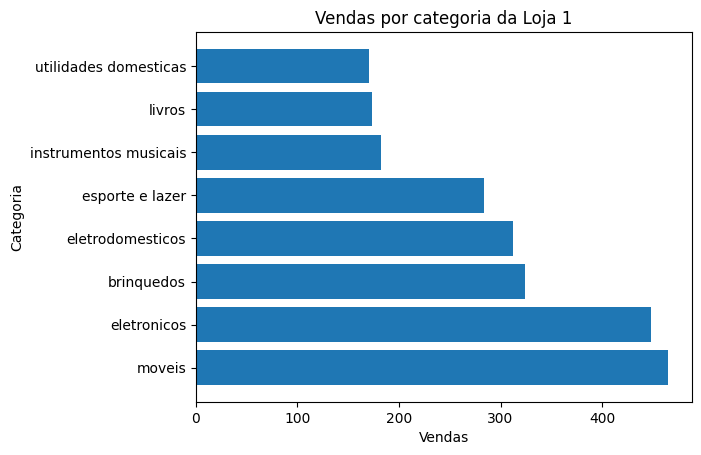

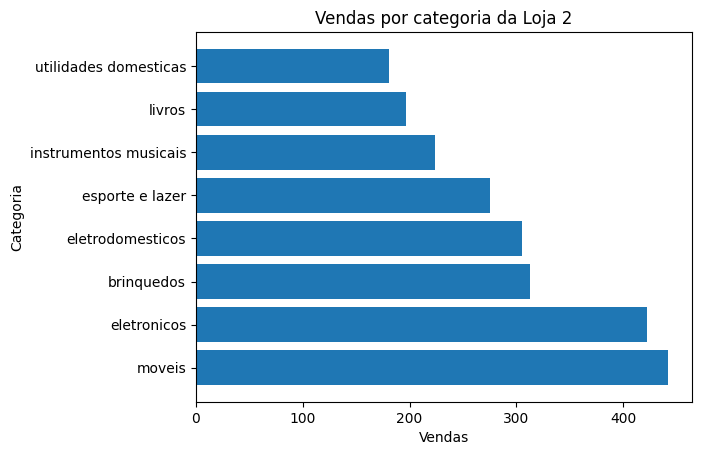

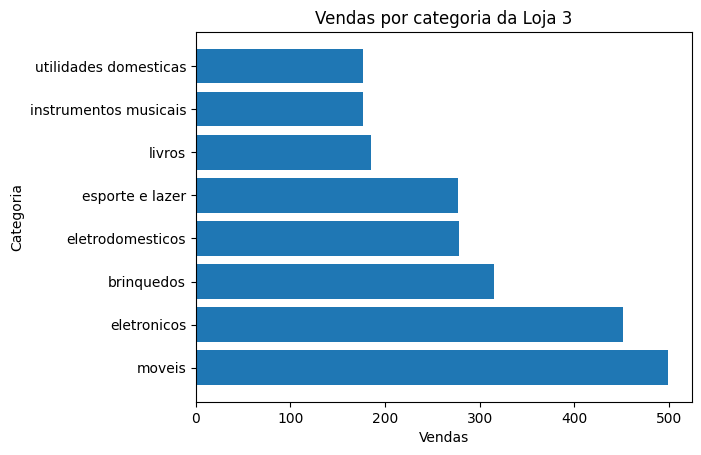

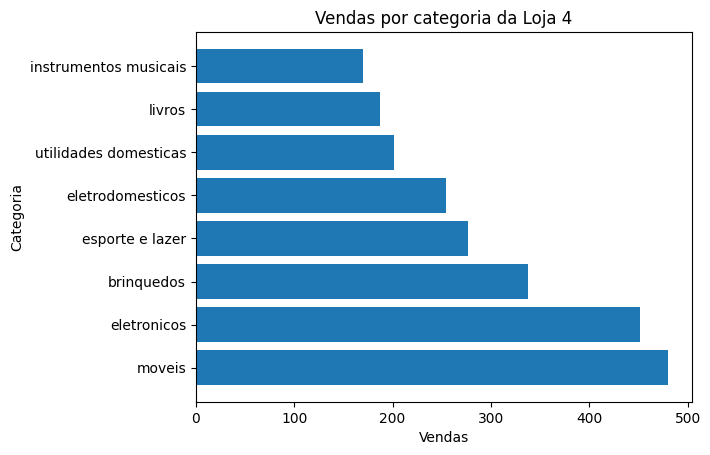

In [106]:
for chave in dict_vendas_por_categoria.keys():
  plt.barh(dict(dict_vendas_por_categoria[chave]).keys(), dict(dict_vendas_por_categoria[chave]).values())
  plt.title(f'Vendas por categoria da {chave}')
  plt.ylabel('Categoria')
  plt.xlabel('Vendas')
  plt.show()

# 3. Média de Avaliação das Lojas

In [95]:
dict_avaliacoes = {nome_loja: df_loja['Avaliação da compra'].mean() for nome_loja, df_loja in zip(lojas, lista_lojas)}
dict_avaliacoes

{'Loja 1': np.float64(3.976685036032217),
 'Loja 2': np.float64(4.037303942348453),
 'Loja 3': np.float64(4.048325561678677),
 'Loja 4': np.float64(3.9957591178965224)}

# 4. Produtos Mais e Menos Vendidos

In [96]:
produtos_mais_menos_vendidos = {}

for nome_loja, df_loja in zip(lojas, lista_lojas):
    contagem_produtos = df_loja['Produto'].value_counts()
    produto_mais_vendido = contagem_produtos.index[0]
    quantidade_mais_vendido = contagem_produtos.iloc[0]
    produto_menos_vendido = contagem_produtos.index[-1]
    quantidade_menos_vendido = contagem_produtos.iloc[-1]

    produtos_mais_menos_vendidos[nome_loja] = {
        'Mais Vendido': {'Produto': produto_mais_vendido, 'Quantidade': quantidade_mais_vendido},
        'Menos Vendido': {'Produto': produto_menos_vendido, 'Quantidade': quantidade_menos_vendido}
    }

for nome_loja, dados_produtos in produtos_mais_menos_vendidos.items():
    print(f"--- {nome_loja} ---")
    print(f"Mais Vendido: {dados_produtos['Mais Vendido']['Produto']} (Quantidade: {dados_produtos['Mais Vendido']['Quantidade']})")
    print(f"Menos Vendido: {dados_produtos['Menos Vendido']['Produto']} (Quantidade: {dados_produtos['Menos Vendido']['Quantidade']})\n")

--- Loja 1 ---
Mais Vendido: Micro-ondas (Quantidade: 60)
Menos Vendido: Celular ABXY (Quantidade: 33)

--- Loja 2 ---
Mais Vendido: Iniciando em programação (Quantidade: 65)
Menos Vendido: Jogo de tabuleiro (Quantidade: 32)

--- Loja 3 ---
Mais Vendido: Kit banquetas (Quantidade: 57)
Menos Vendido: Blocos de montar (Quantidade: 35)

--- Loja 4 ---
Mais Vendido: Cama box (Quantidade: 62)
Menos Vendido: Guitarra (Quantidade: 33)



# 5. Frete Médio por Loja


In [97]:
dict_fretes = {nome_loja: df_loja['Frete'].mean() for nome_loja, df_loja in zip(lojas, lista_lojas)}
dict_fretes

{'Loja 1': np.float64(34.69180491551149),
 'Loja 2': np.float64(33.62194065817927),
 'Loja 3': np.float64(33.07446427411743),
 'Loja 4': np.float64(31.278997081841727)}

# 6. Long e Lat por Loja

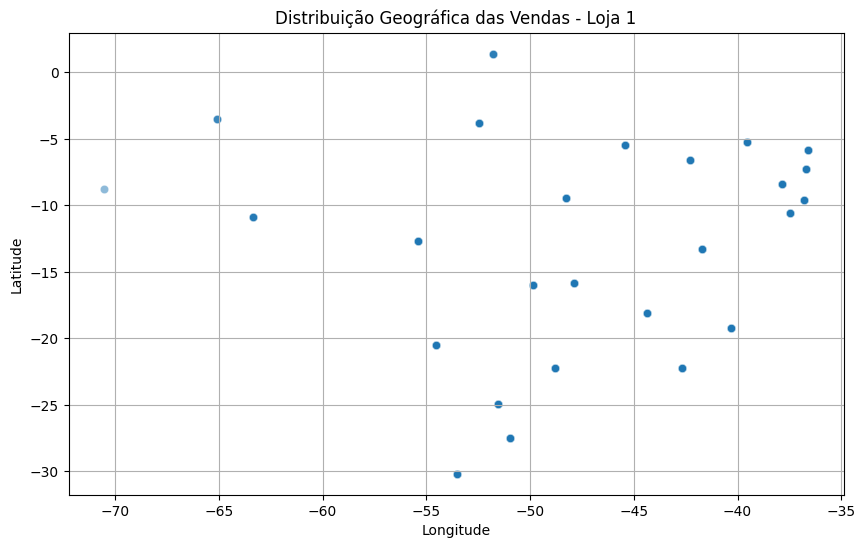

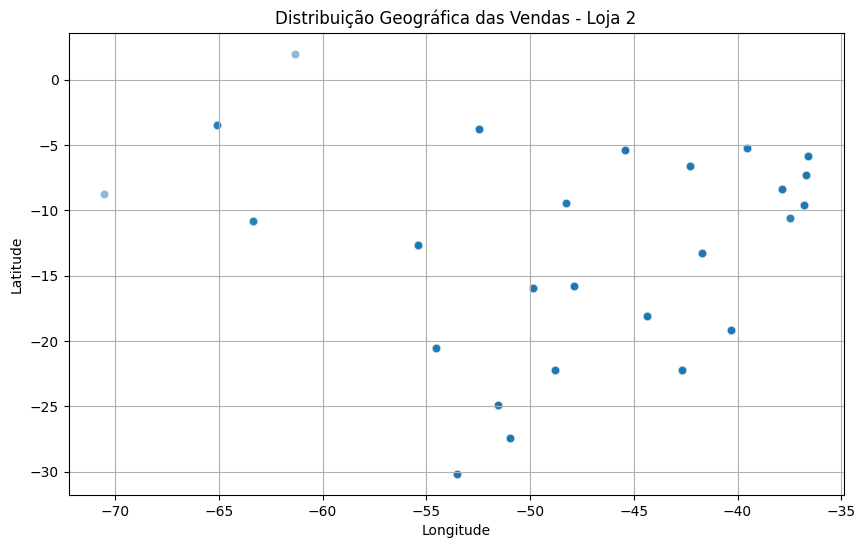

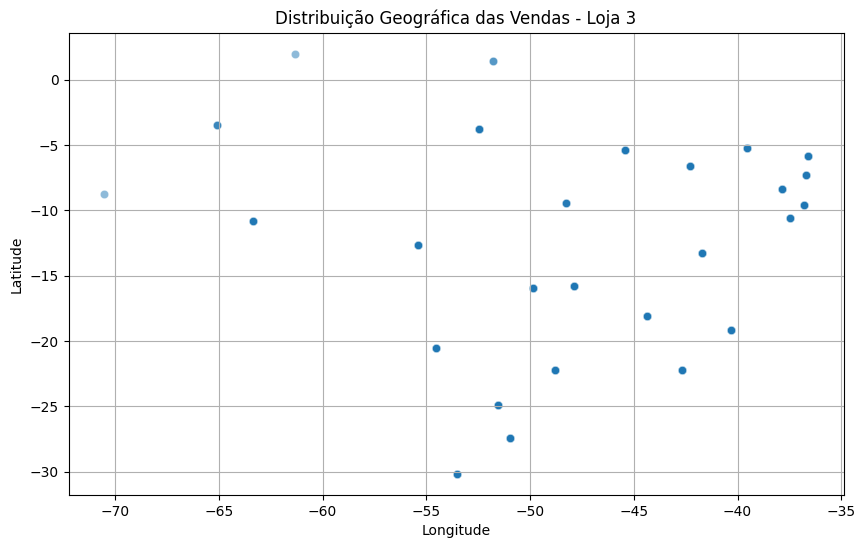

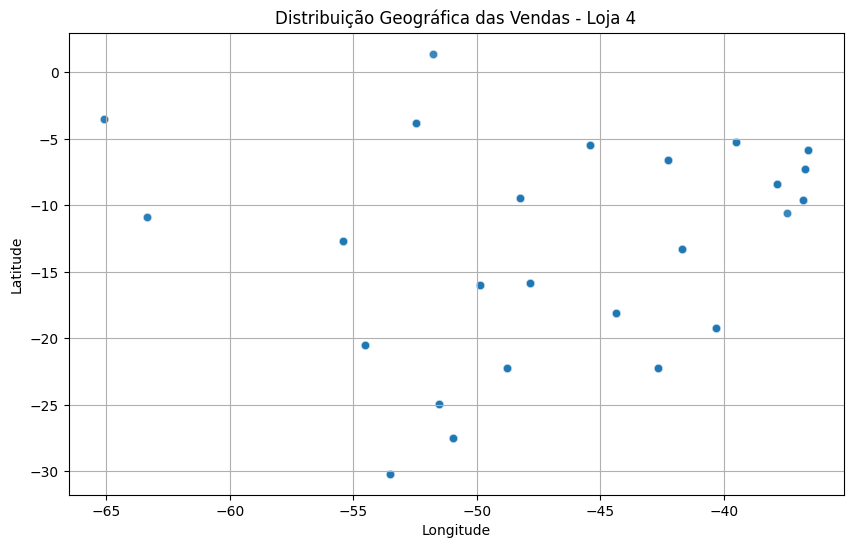

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

for nome_loja, df_loja in zip(lojas, lista_lojas):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_loja, x='lon', y='lat', alpha=0.5)
    plt.title(f'Distribuição Geográfica das Vendas - {nome_loja}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

# Relatório

# Relatório de Análise das Lojas

Este relatório apresenta as principais descobertas das análises realizadas para cada uma das lojas. Para ajudar a decidir qual loja deve ser fechada em relação as outras 3, cada uma das análises (com exceção da análise 6) pontua uma das 4 lojas em sua posição

A loja menor pontuada é a selecionada para fechar.

## *Faturamento*

- Faturamento Loja 1: R\$1.534.509,12 <- 4 Pontos
- Faturamento Loja 2: R\$1.488.459,06 <- 3 Pontos
- Faturamento Loja 3: R\$1.464.025,03 <- 2 Pontos
- Faturamento Loja 4: R\$1.384.497,58 <- 1 Pontos

## *Vendas por Categoria*
Observação sobre as vendas por categoria: Identificou-se que as categoria de produtos mais vendidos são semelhantes entre as lojas. Observando o nicho das lojas, a loja que tiver mais vendas somadas de **Móveis**, **Eletronicos** e **Brinquedos** será melhor pontuada.

- Somatório de vendas p/ tipo Loja 1: **1.237 vendas** <- 2 Pontos
- Somatório de vendas p/ tipo Loja 2: **1.177 vendas** <- 1 Pontos
- Somatório de vendas p/ tipo Loja 3: **1.265 vendas** <- 3 Pontos
- Somatório de vendas p/ tipo Loja 4: **1.269 vendas** <- 4 Pontos

## *Média de Avaliação*
- Loja 1: 3.98 <- 1 Pontos
- Loja 2: 4.04 <- 3 Pontos
- Loja 3: 4.09 <- 4 Pontos
- Loja 4: 4.00 <- 2 Pontos

## *Frete Médio *(menor é melhor)
Paga mais caro em frete pode desinsentivar o comprador a voltar a comprar novamente, mesmo que seja um produto agradável.

- Frete Médio Loja 1: R\$34,69 <- 1 Pontos
- Frete Médio Loja 2: R\$33.62 <- 2 Pontos
- Frete Médio Loja 3: R\$33.07 <- 3 Pontos
- Frete Médio Loja 4: R\$31.28 <- 4 Pontos


## Análise Final

- Loja 1: 8 pontos
- Loja 2: 9 pontos
- Loja 3: 12 pontos
- Loja 4: 11 pontos

A loja 1, apesar de ser a com maior faturamento, é a com menor avaliação média, maior custo de frete e uma das maiores taxas de vendas fora do nicho da rede de lojas.

Seria necessário fazer uma análise de custos e vendas por período, além de ser possível aplicar uma lógica de pesos nas métricas sugeridas acima (como peso 2 para faturamento total), mas superficialmente, pode ser a loja selecionada para ser fechada.